<a href="https://colab.research.google.com/github/DipeshPun/ML/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

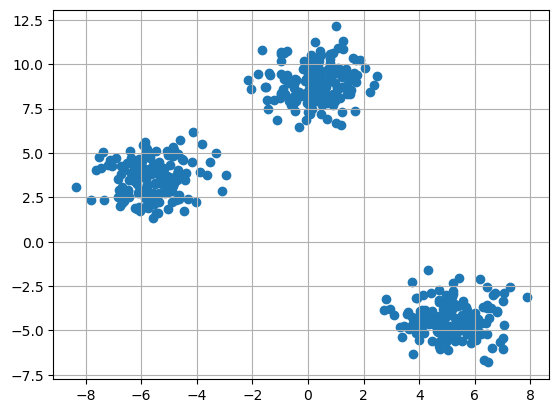

In [2]:
x,y=make_blobs(n_samples=500,centers=3,n_features=2,random_state=23)
fig=plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [6]:
k=3
clusters={}
np.random.seed(13)

for idx in range(k):
  center = 2*(2*np.random.random((x.shape[1],))-1)
  points=[]
  cluster={
      'center': center,
      'points':[]
  }
  clusters[idx]= cluster
clusters

{0: {'center': array([ 1.11080964, -1.04983512]), 'points': []},
 1: {'center': array([1.29711413, 1.86299679]), 'points': []},
 2: {'center': array([ 1.89040446, -0.18620301]), 'points': []}}

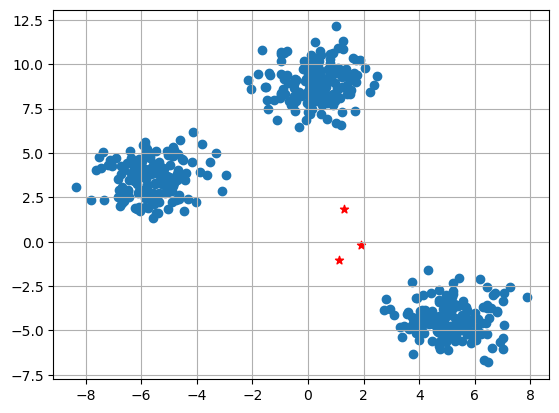

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],color='red',marker='*')
plt.show()

In [8]:
def distance(p1,p2):
  return np.sqrt(np.sum(p1-p2**2))

In [9]:
#Create a function to assign and update the cluster center
def assign_clusters(x,clusters):
  for idx in range (x.shape[0]):
    dist=[]
    curr_x=x[idx]
    for i in range(k):
      dis= distance(curr_x,clusters[i]['center'])
      dist.append(dis)
      #Corrected typo here: curr_cluster instead of curr_luster
      curr_cluster=np.argmin(dist)
      clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(x,clusters):
      for i in range(k):
        points=np.array(clusters[i]['points'])
        if points.shape[0]>0:
          new_center=np.mean(points,axis=0)
          clusters[i]['center']=new_center
          clusters[i]['points']=[]
        return clusters


In [10]:
#Create a function to predict the cluster for the datapoints
def pred_cluster(x,clusters):
  pred=[]
  for i in range(x.shape[0]):
    dist=[]
    for j in range(k):
      dist.append(distance(x[i],clusters[j]['center']))
      pred.append(np.argmin(dist))
  return pred

In [11]:
#Assign, Update and predict the cluster center
clusters= assign_clusters(x,clusters)
clusters= update_clusters(x,clusters)
pred= pred_cluster(x,clusters)

C:\Users\Dell\AppData\Local\Temp\ipykernel_45492\3712567562.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum(p1-p2**2))


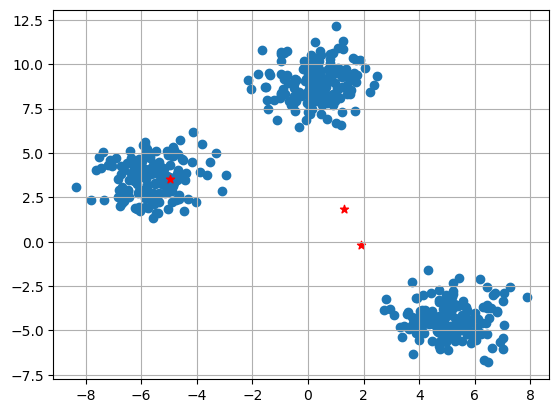

In [12]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],color='red',marker='*')
plt.show()